# Automated detection of Multiple Sclerosis patients by brain connectivity networks

## Abstract 


## Index

**1. Introduction**

**2. Methods**

- 2.1: MRI acquistion

- 2.2: Data available

- 2.3: Parcellation scheme

- 2.4: Brain Networks Connectivity

    - 2.4.1. Structural white matter brain network
    - 2.4.2. Structural gray matter brain network
    - 2.4.3. Resting-state functional brain network

- 2.5: Data preprocessing steps

    - 2.5.1. Load data 
    - 2.5.2. Connectivity test (filtering the connections present in less than 60% of the FA-weighted matrices from healthy cohort)
    - 2.5.3. Age and gender correction
    - 2.5.4. Data harmonization (ComBat)
    - 2.5.5. Imputation by the higher prevalence of zero values
    - 2.5.6. Statistically significant connections with Bonferroni
    - 2.5.7. Data Augmentation

**3. Results**

- 3.1: Connectogram
- 3.2: Machine learning algorithms to classify between healthy controls and MS patients

    - 3.2.1. Visualization and Evaluation Function
    - 3.2.2. ML Models
        - 3.2.2.1. Logistic Regression
        - 3.2.2.2. Support Vector Regressor
        - 3.2.2.3. Random Forest Classifier
        - 3.2.2.4. XGBoost

**4. Conclusions**


## 1. Introduction

Multiple sclerosis (MS) is a chronic inflammatory, demyelinating and neurodegenerative disease of the central nervous system characterized by the presence of focal lesions and widespread damage of the normal-appearing white (NAWM) and grey (GM) matter (Lassmann, Brück and Lucchinetti, 2007). MS disease course present substantial heterogeneity in their pathological processes and different patterns of damage have been described  (Mahad, Trapp and Lassmann, 2015; Lassmann, 2018). Indeed, while  the active plaques are often found in early disease, at later stages, smoldering, inactive, and shadow plaques predominate. Also, chronic active lesions are associated with more aggressive disease evolution (Absinta et al., 2019) and while some patients recover completely from relapses others accumulate disability in a short period of time, probably due to differences in remyelination and diffuse neurodegenerative damage. However, the changes observed in conventional MRI are poorly associated with the clinical outcomes and disease evolution, in part due to the inability of conventional imaging to characterize the heterogeneous pathology of normal-appearing brain tissue (NAWM and NAGM).

 
The use of advanced analysis techniques algorithms is expanding the knowledge in MS disease, and has been applied recently to classify between healthy controls and patients (Solana & Martinez-Heras et al., 2019), among different clinical profiles of MS (Zurita et al., 2018), depict disease evolution (Muthuraman et al., 2016) or to characterize the different degree of damage into MS lesions types (Martinez-Heras & Solana et al., 2020). **We hypothesize that the information of morphological, structural and functional network patterns can potentially used as predictive classification method to discriminate between healthy controls (HC) and MS patients. Contrary to the previous article by (Martinez-Heras et al. & Solana et al., 2019), in this study we are going to use the information of the disruptions connections of brain networks instead of graph topological measures. Moreover, the identification of these relevant connections associated to the network integrity in the MS disease could be a useful biomarker to enhance our understanding of the network connectivity changes associated to the network collapse (Schoonheim et al., 2015).**   

## 2. Methods

### 2.1: MRI acquistion

MRI acquisition protocols were acquired on a 3T Magnetom Trio scanner (SIEMENS, Erlanger, Germany) using a 32 channel phased-array head coil. In part of the cohort (n=71 participants), the high-resolution three-dimensional Magnetization-Prepared Rapid Acquisition with Gradient Echo (3D-MPRAGE) was acquired with TR = 1800 ms; TE = 3.01 ms; TI = 900 ms; 240 sagittal slices with 0.94 mm isotropic voxel size and a 256 × 256 matrix size; and the three-dimensional Fluid Attenuated Inversion Recovery (3D-T2 FLAIR) with TR = 5000 ms; TE = 304 ms; TI = 1800 ms; 192 sagittal slices with 0.94 mm isotropic voxel size and a 256 × 256 matrix size. The Diffusion-Weighted Imaging (DWI) had a TR = 14800 ms; TE = 103 ms; 100 contiguous axial slices; 1.5 mm isotropic voxel size; a 154 × 154 matrix size; b value = 1000 s/ mm2; 60 diffusion encoding directions and a single baseline image acquired at 0 s/mm2. The reminding participants (n=94) had a 3D-structural image with TR = 1970 ms; TE = 2.41 ms; TI = 1050 ms; 208 sagittal slices with 0.9 mm isotropic voxel size and a 256 x 256 matrix size; and the 3D-T2 FLAIR with TR = 5000 ms; TE = 393 ms; TI = 1800 ms; 208 sagittal slices with 0.9 mm isotropic voxel size and a 256 × 256 matrix size. The DWI acquisition protocol was as follows: TR = 12600 ms; TE = 112 ms; 80 contiguous axial slices; 2 mm isotropic voxel size; a 120 × 120 matrix size; b value = 1500 s/ mm2; 70 diffusion encoding directions and a single baseline image acquired at 0 s/mm2. In addition, field map images were generated in all participants to correct the distortions caused by field inhomogeneities (TE 1/TE 2 = 4.92/7.38 ms, with the same slice prescription, slice thickness and field of view as the DWI sequence).

For both cohorts, it was acquired the same protocol of resting-state functional MRI (rs-fMRI) using BOLD EPI pulse sequence (fat saturation), with TR = 2000 ms; TE = 19 ms; field of view = 220 mm; 40 contiguous axial slices with 1.7 x 1.7 x 3 mm voxel size; GRAPPA-factor of 4 and a total of 450 frames (TA = 15:14 minutes). Magnetic resonance acquisition and processing

### 2.2: Data available

Patients with relapsing-remitting or secondary progressive MS aged between 18 and 65 years were recruited at the MS Unit in the Hospital Clinic of Barcelona. We included a cohort of 147 patients with a diagnosis of MS according to 2010 McDonald criteria (Polman et al. 2011) and 18 HV without a previous or present history of neurological or psychiatric diseases. Physical disability was evaluated using the Expanded Disability Status Scale (EDSS). The Ethics Committee of the Hospital Clinic of Barcelona approved the study, and all participants signed an informed consent. Acquisition details

### 2.3: Parcellation scheme

3D-MPRAGE and 3D-FLAIR images were used to perform the delineation of WM lesions through JIM7 software (http://www.xinapse.com/). Subsequently, WM lesions were filled in 3D-MPRAGE with the intensity of the non-lesional neighboring voxels to improve the registration and segmentation processing of MS patients (Battaglini et al. 2012).   Lesion filling approach was used to parcellate the cortex into 62 GM regions and 14 subcortical regions by Mindboggle software and FSL-FIRST packages respectively (Klein et al. 2017) (Patenaude et al. 2011) . Depiction of those brain regions are considered as the nodes of a brain network.    


### 2.4: Brain Networks Connectivity

#### 2.4.1: Structural white matter brain network

To build FA-weighted connectivity matrix is necessary a DWI preprocessing pipeline has been previously described and well-established by (Tournier et al. 2019). Accordingly, the major components of this pipeline included a MP-PCA denoising, Gibbs ringing removal, eddy current and motion correction, geometrically unwarping procedure and lastly a bias field correction. After these corrections, fractional anisotropy (FA) scalar map was computed from the diffusion tensor model using FSL’s DTIFIT (Basser et al. 1994). The connectome construction derived from FA-weighted indices was generated using the result of the high-order probabilistic streamline tractography between distinct cortical and subcortical GM areas (nodes) of the whole brain. To guarantee a biologically plausible reconstructed streamlines, the process of connectome reconstruction has incorporated the anatomical constrained tractography (ACT) framework, a set of 6 million streamlines have been selected and an anatomical exclusion criteria post-processing (Llufriu et al. 2017) (Martínez-Heras et al. 2015). The parcellation scheme (76 nodes) from anatomical image was aligned to the FA map to determine which streamlines connections need to be selected between pairs of nodes for creating the structural connectome. Finally, we defined the mean value of the FA metric along each connection to generate the FA-weighted adjacency matrix (Solana et al. 2019).



#### 2.4.2: Structural gray matter brain network

We generated another structural network based on the similarity of GM morphological patterns according to the defined anatomical parcellation scheme (Tijms et al. 2012). To estimate this GM connectivity network, we applied an automated pipeline that included two main steps: (1) Reslicing each individual’s native space GM segmentation to 2mm isotropic voxel to later on define small regions of interest corresponding to 3 x 3 x 3 voxel cube (2) Performing statistical similarity (Pearson’s correlation coefficient) along the corresponding voxel cubes. All correlations corresponding for each node, which between them added up, were stored into a matrix to construct the GM network.    

#### 2.4.3: Resting-state functional brain network

Brain signal correlation/synchronization through resting-state functional connectivity (rs-fMRI) matrix was obtained following the analysis method (Chou et al. 2012). This includes several preprocessing steps including slice time and motion correction, spatial normalization to standard space and band-pass filtering to retain frequencies between 0.001 and 0.08 Hz using FSL tools (Jenkinson et al. 2012). Finally, the parcellation nodes were used to extract the average time-series for each of the 76 regions resulting in a functional connectivity matrix.   



### 2.5: Data preprocessing steps

#### 2.5.1. Load data

As described above, data obtained from study participants were stored in three matrices

In [ ]:
##Activate Drive
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
#cd '/content/gdrive/MyDrive/Colab Notebooks/UB/PostGrau/TFM/Capstone_Project'

In [1]:
# Data Load Code
from load_data import data_loader

# Preprocessing functions
from preprocessing import connectivity_test, linear_correction, harmonization
from sklearn.model_selection import train_test_split, ShuffleSplit, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
full_dataset, fa, func, gm = data_loader(unzip=False)

/home/eloydelas/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
fa.tail()

,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-caudalmiddlefrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-cuneus,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-entorhinal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-fusiform,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiortemporal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-isthmuscingulate,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-lateraloccipital,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-lateralorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-lingual,...,fa-ctx-rh-superiortemporal/ctx-rh-transversetemporal,fa-ctx-rh-superiortemporal/ctx-rh-insula,fa-ctx-rh-supramarginal/ctx-rh-transversetemporal,fa-ctx-rh-supramarginal/ctx-rh-insula,fa-ctx-rh-transversetemporal/ctx-rh-insula,age,sex,dd,edss,controls_ms
sFIS_04,0.437912,0.000000,0.0,0.0,0.436493,0.0,0.513600,0.0,0.429750,0.0,...,0.338393,0.366659,0.344687,0.393881,0.332806,32.98,1,-1.0,0.0,0
sFIS_05,0.453001,0.000000,0.0,0.0,0.485008,0.0,0.510843,0.0,0.442475,0.0,...,0.372121,0.403923,0.429492,0.420724,0.392092,23.76,0,-1.0,0.0,0
sFIS_06,0.444399,0.000000,0.0,0.0,0.000000,0.0,0.538231,0.0,0.475603,0.0,...,0.416458,0.415719,0.447216,0.435247,0.410552,24.11,0,-1.0,0.0,0
sFIS_07,0.486600,0.513572,0.0,0.0,0.490968,0.0,0.539344,0.0,0.000000,0.0,...,0.390548,0.413046,0.388173,0.413104,0.361699,23.98,0,-1.0,0.0,0
sFIS_09,0.460415,0.000000,0.0,0.0,0.440825,0.0,0.576394,0.0,0.478940,0.0,...,0.427068,0.446510,0.463700,0.454766,0.422275,23.46,0,-1.0,0.0,0


#### 2.5.2. Connectivity test (filtering the connections present in less than 60% of the FA-weighted matrices from healthy cohort)

In [4]:
# Clinical Data

clinical_data = fa.iloc[:, -5:]

# Connectivity test
index = connectivity_test(fa.iloc[:, :-5], clinical_data)

fa_conec = fa.iloc[:, index]
func_conec = func.iloc[:, index]
gm_conec = gm.iloc[:, index]

fa_conec.tail()

,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-caudalmiddlefrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-isthmuscingulate,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-lateralorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-medialorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-middletemporal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-paracentral,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parsopercularis,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parsorbitalis,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parstriangularis,...,fa-ctx-rh-superiorparietal/ctx-rh-superiortemporal,fa-ctx-rh-superiorparietal/ctx-rh-supramarginal,fa-ctx-rh-superiorparietal/ctx-rh-transversetemporal,fa-ctx-rh-superiorparietal/ctx-rh-insula,fa-ctx-rh-superiortemporal/ctx-rh-supramarginal,fa-ctx-rh-superiortemporal/ctx-rh-transversetemporal,fa-ctx-rh-superiortemporal/ctx-rh-insula,fa-ctx-rh-supramarginal/ctx-rh-transversetemporal,fa-ctx-rh-supramarginal/ctx-rh-insula,fa-ctx-rh-transversetemporal/ctx-rh-insula
sFIS_04,0.437912,0.436493,0.513600,0.429750,0.432757,0.000000,0.420514,0.410831,0.382987,0.401635,...,0.456611,0.410892,0.437383,0.434414,0.356735,0.338393,0.366659,0.344687,0.393881,0.332806
sFIS_05,0.453001,0.485008,0.510843,0.442475,0.465207,0.000000,0.415272,0.461950,0.000000,0.435075,...,0.499724,0.439607,0.478599,0.471359,0.412837,0.372121,0.403923,0.429492,0.420724,0.392092
sFIS_06,0.444399,0.000000,0.538231,0.475603,0.446980,0.000000,0.427906,0.464113,0.431740,0.468737,...,0.523202,0.479137,0.492792,0.499025,0.428173,0.416458,0.415719,0.447216,0.435247,0.410552
sFIS_07,0.486600,0.490968,0.539344,0.000000,0.416983,0.000000,0.421023,0.458127,0.000000,0.428983,...,0.472483,0.448468,0.456415,0.464796,0.400233,0.390548,0.413046,0.388173,0.413104,0.361699
sFIS_09,0.460415,0.440825,0.576394,0.478940,0.492266,0.467873,0.445297,0.471779,0.444573,0.458962,...,0.515955,0.475279,0.507160,0.508530,0.460155,0.427068,0.446510,0.463700,0.454766,0.422275


#### 2.5.3. Age and gender correction

In [5]:
fa_correct = linear_correction(clinical_data, fa_conec)
func_correct = linear_correction(clinical_data, func_conec)
gm_correct = linear_correction(clinical_data, gm_conec)

fa_correct.tail()

,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-caudalmiddlefrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-isthmuscingulate,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-lateralorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-medialorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-middletemporal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-paracentral,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parsopercularis,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parsorbitalis,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parstriangularis,...,fa-ctx-rh-superiortemporal/ctx-rh-transversetemporal,fa-ctx-rh-superiortemporal/ctx-rh-insula,fa-ctx-rh-supramarginal/ctx-rh-transversetemporal,fa-ctx-rh-supramarginal/ctx-rh-insula,fa-ctx-rh-transversetemporal/ctx-rh-insula,age,sex,dd,edss,controls_ms
sFIS_04,0.430788,0.450175,0.515509,0.449645,0.424000,0.0000,0.420407,0.406309,0.384843,0.394141,...,0.332517,0.369312,0.335621,0.394486,0.331953,32.98,1,-1.0,0.0,0
sFIS_05,0.436726,0.509721,0.509667,0.457909,0.442735,0.0000,0.409901,0.440541,0.000000,0.411800,...,0.363557,0.397600,0.415235,0.405084,0.384904,23.76,0,-1.0,0.0,0
sFIS_06,0.428366,0.000000,0.537060,0.490742,0.424838,0.0000,0.422603,0.442999,0.468241,0.445795,...,0.408032,0.409463,0.433186,0.419804,0.403460,24.11,0,-1.0,0.0,0
sFIS_07,0.470477,0.515442,0.538171,0.000000,0.394718,0.0000,0.415694,0.436903,0.000000,0.405918,...,0.382070,0.406766,0.374059,0.397587,0.354572,23.98,0,-1.0,0.0,0
sFIS_09,0.443932,0.465865,0.575213,0.494627,0.469513,0.5199,0.439866,0.450117,0.481965,0.435401,...,0.418385,0.440130,0.449250,0.438958,0.415005,23.46,0,-1.0,0.0,0


#### 2.5.4. Data harmonization (ComBat)

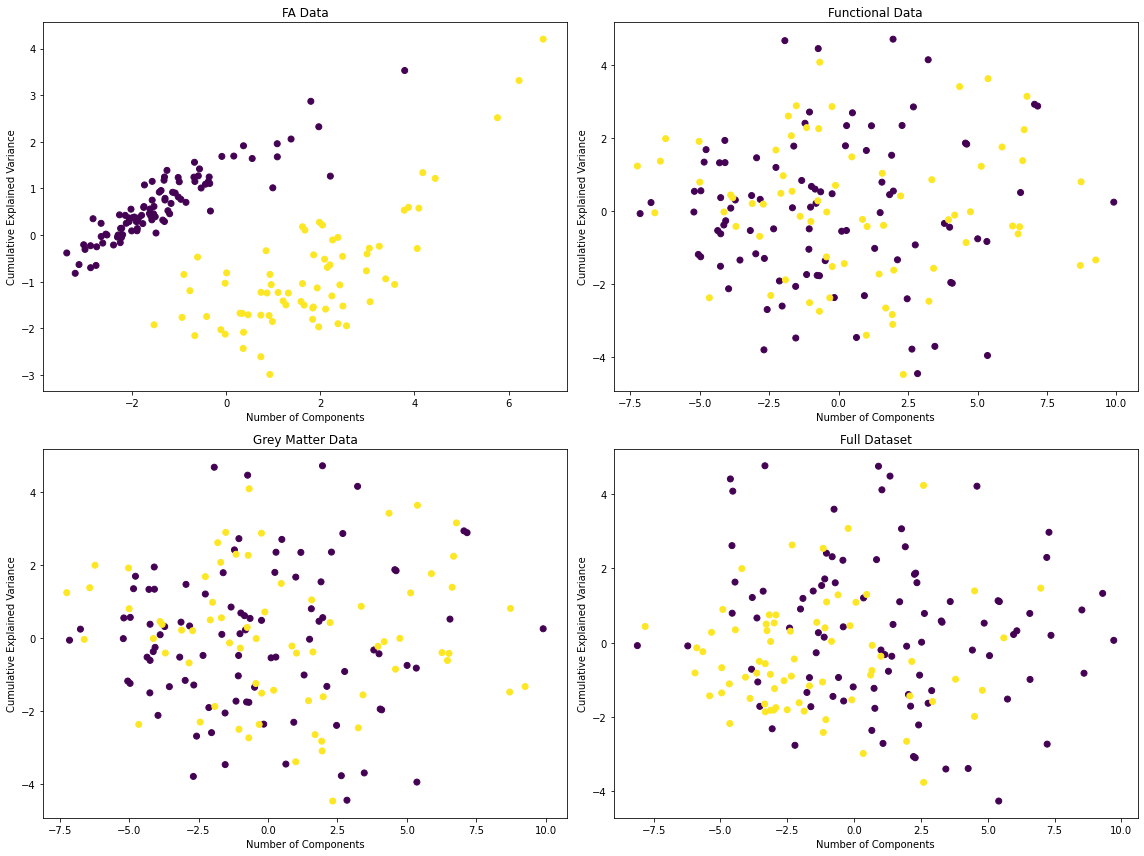

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

data = [fa_correct.iloc[:, :-5], func_correct.iloc[:, :-5], gm_correct.iloc[:, :-5], full_dataset.iloc[:, :-5]]
names = ["FA Data", "Functional Data", "Grey Matter Data", "Full Dataset"]

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
scanner = [0 if "MSVIS" in name else 1 for name in fa.index]

for i in range(2):
    for j in range(2):
        pca_variables = data[i+j]
        pca = PCA(n_components=2)
        pca_fa = pd.concat([pd.DataFrame(pca.fit_transform(pca_variables)), pd.DataFrame(scanner, columns=["scanner"])], join="inner", axis=1)
        axs[i, j].scatter(x=pca_fa[0], y=pca_fa[1], c=pca_fa["scanner"])

for i,ax in enumerate(axs.flat):
    ax.set(xlabel='Number of Components', ylabel='Cumulative Explained Variance', title=names[i])
    
fig.tight_layout()

In [7]:
#! git clone https://github.com/Jfortin1/neuroCombat.git

In [8]:
from neuroCombat import neuroCombat

dat = fa_correct.iloc[:, :-5].transpose()

index = [name for name in fa_correct.index]
scanner = [0 if "MSVIS" in name else 1 for name in index]
clinical_data["scanner"] = scanner

har_data = neuroCombat(dat = dat,
                       covars = clinical_data,
                       batch_col = "scanner")
#har_data = harmonization(dat,clinical_data)

[neuroCombat] Creating design matrix
[neuroCombat] Standardizing data across features
[neuroCombat] Fitting L/S model and finding priors
[neuroCombat] Finding parametric adjustments
[neuroCombat] Final adjustment of data


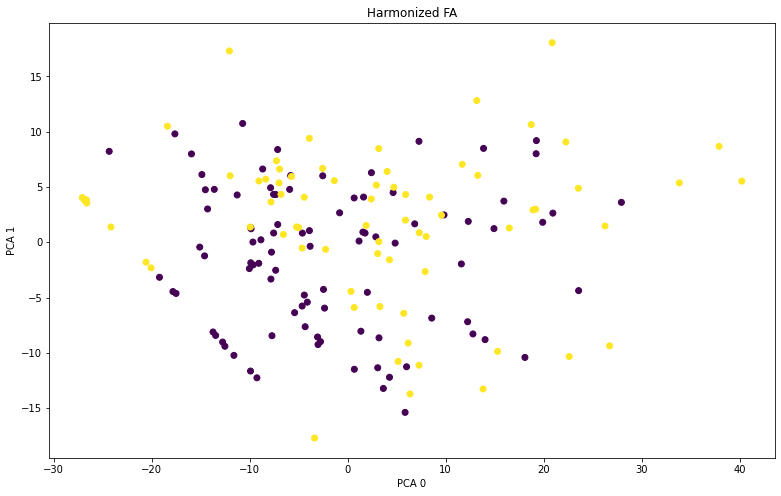

In [9]:
clinical_data.drop(["scanner"], axis=1, inplace=True)
fa_har = pd.concat([pd.DataFrame(har_data["data"].transpose(), index = fa_correct.iloc[:, :-5].index, columns = fa_correct.iloc[:, :-5].columns), clinical_data], 
                     join = "inner", 
                     axis=1)

pca_variables = fa_har
pca_fa = PCA(n_components=2)
pca_fa = pd.concat([pd.DataFrame(pca.fit_transform(pca_variables)), pd.DataFrame(scanner, columns=["scanner"])], join="inner", axis=1)
plt.figure(figsize=(13, 8))
plt.xlabel("PCA 0")
plt.ylabel("PCA 1")
plt.title("Harmonized FA")
plt.scatter(x=pca_fa[0], y=pca_fa[1], c=pca_fa["scanner"])

#### 2.5.5. Imputation by the higher prevalence of zero values

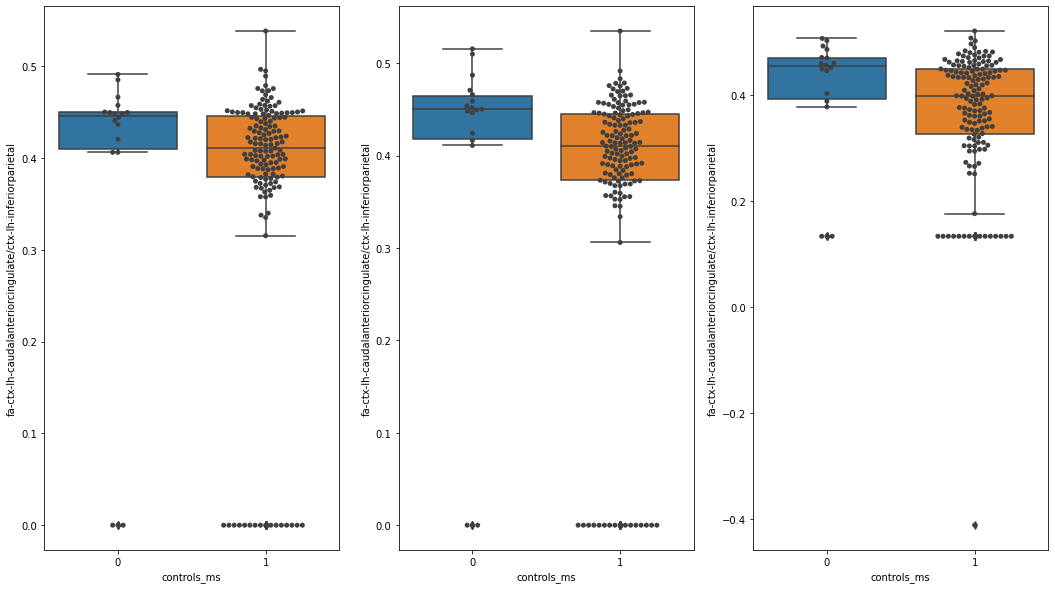

In [10]:
data = [pd.concat([fa_conec, clinical_data], join="inner", axis=1), fa_correct, fa_har]

fig, axes = plt.subplots(1, 3, figsize=(18, 10))

for i in range(3):
    sns.boxplot(ax=axes[i],
                y=fa_conec.columns[1], 
                x='controls_ms', 
                data=data[i])

    sns.swarmplot(ax = axes[i],
                  y=fa_conec.columns[1], 
                  x='controls_ms', 
                  data=data[i], 
                  color=".25")

In [11]:
def outlier_imputation(neuro_data):
    """
    Deals with the problem of zero-values in data by using linear regression models for imputation.

    Arguments:
    ----------

    neuro_data: data that have to be corrected. Important, do not include Clinical Data.

    Returns:
    --------

    pandas dataframe with the corrected data.
    """
    columns = [col for col in neuro_data.columns]
    df = neuro_data.copy()
    
    model = LinearRegression()

    for col in columns:
        if df[df[col] == 0].shape[0] != 0:
            X_train, y_train = df[df[col] != 0].drop([col], axis = 1), df[df[col] != 0][col]
            X_test = df[df[col] == 0].drop([col], axis = 1)

            model = LinearRegression()
            model.fit(X_train, y_train)
            pred = model.predict(X_test)

            df.loc[X_test.index, col] = pred
    return df

In [12]:
from sklearn.linear_model import LinearRegression

fa_imputed = outlier_imputation(fa_correct.iloc[:, :-5])
func_imputed = outlier_imputation(func_correct.iloc[:, :-5])
func_imputed = pd.concat([func_imputed, func.iloc[:, -5:]], axis=1, join="inner")
gm_imputed = outlier_imputation(gm_correct.iloc[:, :-5])
gm_imputed = pd.concat([gm_imputed, gm.iloc[:, -5:]], axis=1, join="inner")

#harmonization
dat = fa_imputed.iloc[:, :-5].transpose()

index = [name for name in fa_imputed.index]
scanner = [0 if "MSVIS" in name else 1 for name in index]
clinical_data["scanner"] = scanner

har_data = neuroCombat(dat = dat,
                       covars = clinical_data,
                       batch_col = "scanner")

#clinical_data.drop(["scanner"], axis=1, inplace=True)
fa_har = pd.concat([pd.DataFrame(har_data["data"].transpose(), index = fa_imputed.iloc[:, :-5].index, columns = fa_imputed.iloc[:, :-5].columns), clinical_data], 
                     join = "inner", 
                     axis=1)

[neuroCombat] Creating design matrix
[neuroCombat] Standardizing data across features
[neuroCombat] Fitting L/S model and finding priors
[neuroCombat] Finding parametric adjustments
[neuroCombat] Final adjustment of data


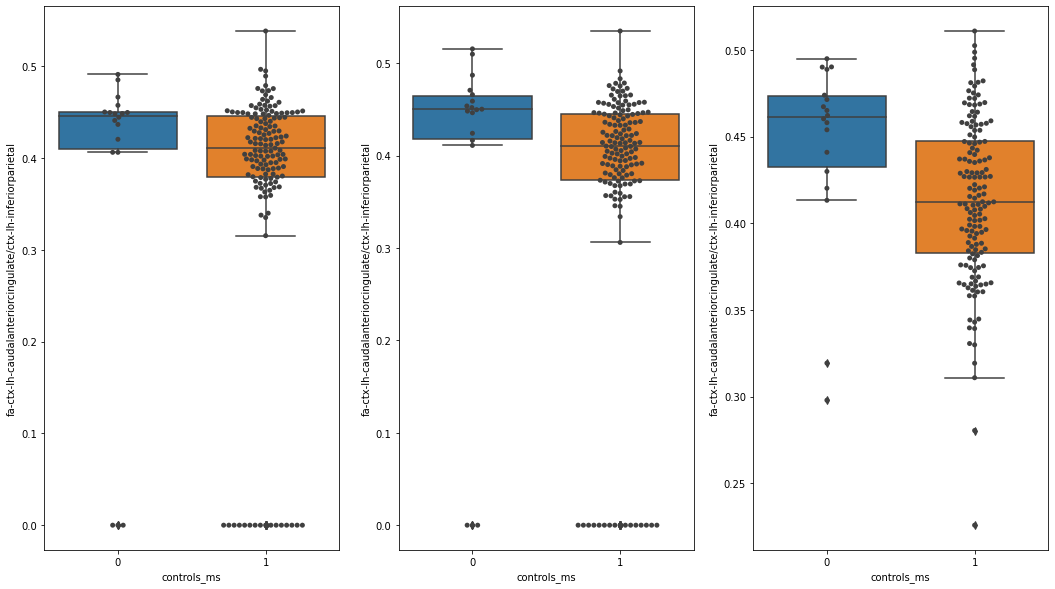

In [13]:
data = [pd.concat([fa_conec, clinical_data], join="inner", axis=1), fa_correct, fa_har]

fig, axes = plt.subplots(1, 3, figsize=(18, 10))

for i in range(3):
    sns.boxplot(ax=axes[i],
                y=fa_conec.columns[1], 
                x='controls_ms', 
                data=data[i])

    sns.swarmplot(ax = axes[i],
                  y=fa_conec.columns[1], 
                  x='controls_ms', 
                  data=data[i], 
                  color=".25")

#### 2.5.6. Statistically significant connections with Bonferroni

In [19]:
def types_diff(data):
    conn_stat = pd.DataFrame(columns=['ROI','pvalue'])
    feats = data.iloc[:, :-6].columns.to_list() #age,sex,dd,edss,controls_ms,scanner
    for connections in feats:
        stat,p = shapiro(data[connections])
        alpha=0.05
        sample1 = data.loc[data["controls_ms"]==0,connections]
        sample2 = data.loc[data["controls_ms"]==1,connections]
        if p > alpha:
            stat, p = bartlett(sample1,sample2)
            homovar = True
            if (p<=0.05):
                homovar = False
            stat,p = ttest_ind(sample1,sample2,equal_var=homovar)
        else:
            stat,p = mannwhitneyu(data.loc[data["controls_ms"]==0,connections],data.loc[data["controls_ms"]==1,connections],alternative='two-sided')
    
        if (p<=0.05):
            conn_stat = conn_stat.append({'ROI': connections,'pvalue': p}, ignore_index=True)
        
    print('Statistically diferences in %d of connections' % len(conn_stat))

    diff = conn_stat.copy()

    p_corr = multipletests(diff["pvalue"], alpha = 0.05, method = "bonferroni", is_sorted = False)
    diff["p_corr"] = p_corr[1] #Added the bonferroni correction
    diff_fdr = diff[diff["p_corr"] < 0.05] 
    print('Statistically diferences in %d of connections with Bonferroni correction (p-value multiplied by number of correlations) ' % len(diff_fdr))
    diff_fa = diff_fdr["ROI"].tolist()
    fa_clinic = data.loc[:,["age", "sex", "dd", "edss", "controls_ms"]]
    fa_har_bonferroni = data[diff_fa]
    fa_har_corr = pd.merge(fa_har_bonferroni, fa_clinic, left_index=True, right_index=True)
    
    return(fa_har_corr,diff_fdr["p_corr"])

In [20]:
# Statistics
from scipy.stats import mannwhitneyu, ttest_ind, bartlett, shapiro
from statsmodels.stats.multitest import fdrcorrection, multipletests
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
#FA-weighted connections statistically significant 
fa_final,fa_corr = types_diff(fa_har)

Statistically diferences in 1125 of connections
Statistically diferences in 183 of connections with Bonferroni correction (p-value multiplied by number of correlations) 


In [21]:
#Structural gray matter brain network 
gm_final,gm_corr = types_diff(gm_imputed)

Statistically diferences in 381 of connections
Statistically diferences in 3 of connections with Bonferroni correction (p-value multiplied by number of correlations) 


In [22]:
#Resting-state functional brain network
func_final,func_corr = types_diff(func_imputed)

Statistically diferences in 128 of connections
Statistically diferences in 1 of connections with Bonferroni correction (p-value multiplied by number of correlations) 


In [23]:
data_final = pd.concat([fa_final.iloc[:, :-5], gm_final.iloc[:, :-5], func_final.iloc[:, :-5]], join="inner", axis=1)

In [24]:
#Adding pvalues corrected
data_corr = fa_corr.append(gm_corr)
data_corr = data_corr.append(func_corr)

**2.5.7. Data Augmentation**

Once the data has passed the Connectivity Test, imputed from the zero-values problem and corrected from biases such as age, gender, and scanner effects, there is still one major problem related to it: the imbalance of the classes. An imbalanced classification problem is an example of a classification problem where the distribution of examples across the known classes is biased or skewed, which is the case since the data is composed of 147 patients and 18 controls.

Severely imbalanced classes have a negative impact on model classification since these models are built behind the assumption of an equal number of examples for each class. This will result in poor predictive performance, specifically for the minority class. In this particular case, in a scenario of small and complex data, we have found that if the imbalanced problem is not corrected, classification models tend to ignore the minority class and only predict the majority class.

There are several methods to deal with imbalanced classes. A relatively new approach to correct this problem in medical research that has shown extremely good results is the imbalance correction by using *Generative Adversarial Networks* (GANs). However, since this technique has normally been applied to images and the available data is not enough to build a proper GAN model, this option has been discarded. Despite not being able to train a GAN, other balancing techniques have shown good results, one of them is the **Synthetic Minority Oversampling Technique (SMOTE)**. This technique builds new instances for the imbalanced class by using the K Nearest Neighborhoods algorithm.

In [ ]:
def data_augmentation(X, y):
    """
    performing data augmentation by using the SMOTE library, which created new instances by using KNN algorithm.
    
    Arguments:
    ---------
    X: Independent variables
    y: Target

    Returns:
    -------
    X: data-augmented independent variables
    y: data-augmented target
    """

    sm = SMOTE(random_state=42)
    X_res, Y_res = sm.fit_resample(X, y)

    df_smote_over = pd.concat([pd.DataFrame(X_res), pd.DataFrame(Y_res)], axis=1, join="inner")

    return df_smote_over

In [ ]:
from imblearn.over_sampling import SMOTE

df_final = data_augmentation(data_final, fa_final.iloc[:, -1]) # Control vs MS
X = df_final.iloc[:, :-1]
y = df_final.iloc[:, -1]

## 3. Results

### 3.1: Data visualization: Connectogram 

Visualization of statistically significant connections of brain networks (FA, GM and rsfmri). 

In [26]:
#! pip install nxviz #Circos plots library

In [27]:
### The required libraries and packages ###
import networkx as nx
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nxviz.plots import CircosPlot

In [28]:
#Parcellation scheme
names = pd.read_csv("fs_default.txt", sep=",", header=None)
rois = names[1].tolist() #nodes_list
names[1] = names[1].apply(str.strip)
names.columns = ["ROI", "ROI_name"]
#names["ROI2_name"] = names["ROI1_name"]
names.head()

,ROI,ROI_name
0,1,ctx-lh-caudalanteriorcingulate
1,2,ctx-lh-caudalmiddlefrontal
2,3,ctx-lh-cuneus
3,4,ctx-lh-entorhinal
4,5,ctx-lh-fusiform


In [29]:
#Database of nodes interactions. The result is a dataframe in which each row
#contains the pair of nodes and the pvalues scores corrected, weighted edges
stat1 = pd.DataFrame(columns=['ROI_name'])
stat2 = pd.DataFrame(columns=['ROI_name'])

col = data_final.iloc[:, :].columns.to_list()
for nodes in col:
    rois= nodes.split('/') #split each pair of nodes 
    line = rois[0][3:] #Remove the 4 characters
    stat1 = stat1.append({'ROI_name': line}, ignore_index=True) 
    stat2 = stat2.append({'ROI_name': rois[1]}, ignore_index=True) 

In [30]:
rois_df1 = stat1.merge(names, how='left', on="ROI_name",sort=False)
rois_df2 = stat2.merge(names, how='left', on="ROI_name",sort=False)
connectogram_stat = pd.merge(rois_df1,rois_df2, left_index=True, right_index=True)
connectogram_stat.columns = ["ROI1_name", "ROI1","ROI2_name", "ROI2"]
interactions = connectogram_stat[['ROI1_name', 'ROI2_name']]
#Adding pvalue corrected to dataframe
interactions["pvalue"] = data_corr.values
interactions.head()

<ipython-input-30-4a1137709707>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interactions["pvalue"] = data_corr.values


,ROI1_name,ROI2_name,pvalue
0,ctx-lh-caudalanteriorcingulate,Left-Caudate,0.001905
1,ctx-lh-caudalmiddlefrontal,ctx-rh-paracentral,0.018843
2,ctx-lh-cuneus,ctx-lh-fusiform,0.024392
3,ctx-lh-cuneus,ctx-lh-inferiortemporal,0.005887
4,ctx-lh-cuneus,ctx-lh-middletemporal,0.004585


In [31]:
G=nx.Graph(name='Connectogram')
interactions = np.array(interactions) # convert to array
for i in range(len(interactions)):
    interaction = interactions[i]
    a = interaction[0] # node 1
    b = interaction[1] # node 2
    w = (5-(int(float(interaction[2])*100)))*2 # pvalue as weighted edge where range 0 is the lowest significance and 10 the highest.
    
#   #if w > 0: # only keep high scoring edges
    # To include all the weighted connections
    G.add_weighted_edges_from([(a,b,w)])

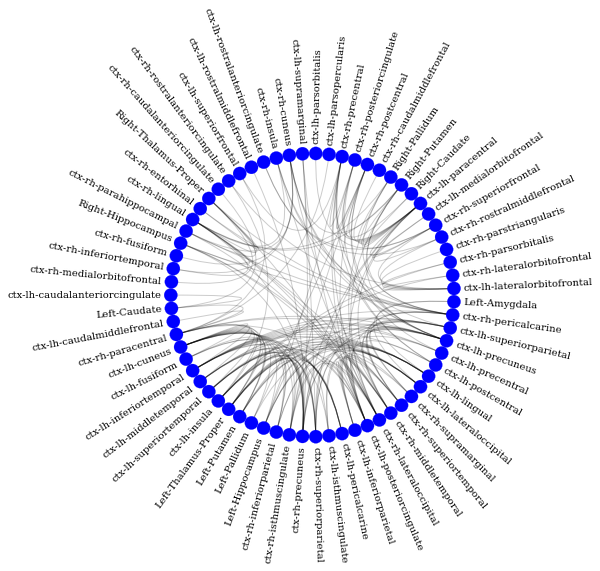

In [32]:
c = CircosPlot(G,node_labels=True, node_label_layout="rotation")
c.draw()
plt.show()

In [53]:
# function to rescale list of values to range [newmin,newmax]
def rescale(l,newmin,newmax,rnd=False):
    arr = list(l)
    return [round((x-max(arr))/(min(arr)-max(arr))*(newmax-newmin)+newmin,2) for x in arr]

nodelist = [n for n in G.nodes]
ws = rescale([float(G[u][v]['weight']) for u,v in G.edges],1,10)
edgelist = [(str(u),str(v),{"weight":ws.pop(0)}) for u,v in G.edges]

# create new graph using nodelist and edgelist
g = nx.Graph(name='Connectogram')
g.add_nodes_from(nodelist)
g.add_edges_from(edgelist)
# go through nodes in graph G and store their degree as "class" in graph g
for v in G:
    g.nodes[v]["class"] = G.degree(v)

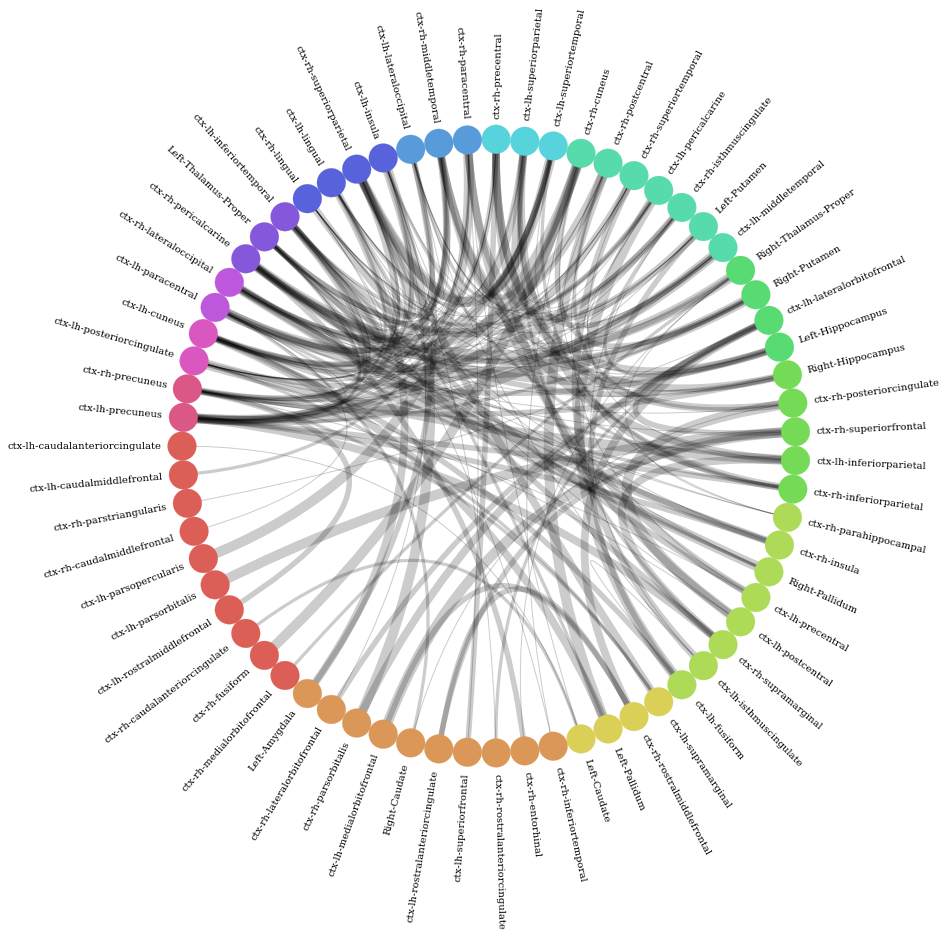

In [54]:
c = CircosPlot(graph=g,figsize=(13, 13),node_grouping="class", node_color="class",
               edge_width="weight",node_labels=True, node_label_layout="rotation")
c.draw()

### 3.2: Machine learning algorithms to classify between healthy controls and MS patients 

In [10]:
# Preprocessing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
# Metrics
from sklearn.metrics import f1_score, recall_score, precision_score, plot_roc_curve, auc, plot_confusion_matrix, confusion_matrix

from sklearn.decomposition import PCA

In [2]:
from preprocessing import classifier_pipeline
from load_data import data_loader

import numpy as np
import pandas as pd

_, fa, gm, func = data_loader(unzip=False)

X, y = classifier_pipeline(fa, gm, func)

c:\Users\franc\OneDrive\Documentos\Programació\Data Science\Capstone_Project\load_data.py:60: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  clinical_data = pd.read_excel(path + "subject_clinical_data.xlsx")
[neuroCombat] Creating design matrix
[neuroCombat] Standardizing data across features
[neuroCombat] Fitting L/S model and finding priors
[neuroCombat] Finding parametric adjustments
[neuroCombat] Final adjustment of data
Statistically diferences in 1131 of connections
Statistically diferences in 186 of connections with FDR
Statistically diferences in 130 of connections
Statistically diferences in 4 of connections with FDR
Statistically diferences in 383 of connections
Statistically diferences in 6 of connections with FDR


**3.2.1. Visualization and Evaluation Function**

In [3]:
def pca_visualization(X, y):
    pca = PCA(n_components = 2)
    sc = StandardScaler()

    X_std = sc.fit_transform(X)

    pca_df = pd.DataFrame(pca.fit_transform(X_std))

    return pca_df

def evaluation(X, y, model):
    errors = list()
    mean_score = 0
    logistic_model = model
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    sc = StandardScaler()

    fig, ax = plt.subplots(2, 2, figsize=(18, 12))
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    list_0 = list() #
    list_1 = list() #

    for i, (train_index, test_index) in enumerate(kf.split(X, y)):
        X_train, y_train = sc.fit_transform(X.iloc[train_index, :]), y.iloc[train_index]
        X_test, y_test = sc.transform(X.iloc[test_index, :]), y.iloc[test_index]
        logistic_model.fit(X_train, y_train)
        y_hat = logistic_model.predict(X_test)
        list_0.append([i for i in y_test]) #
        list_1.append([i for i in y_hat]) #
        viz = plot_roc_curve(logistic_model, X_test, y_test,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax[0][0])
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

        for i,val in enumerate(y_hat):
            if val != y_test.iloc[i]:
                if test_index[i] not in errors:
                    errors.append(test_index[i])

    #########################
    #       ROC Curve       #
    #########################
    
    ax[0][0].plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax[0][0].plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax[0][0].fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

    ax[0][0].set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
        title="Receiver operating characteristic example")
    ax[0][0].legend(loc="lower right")

    ###################################
    #       Confusion Matrix          #
    ###################################

    final_list_0 = list()
    final_list_1 = list()
    for i in range(len(list_0)):
        for j in list_0[i]:
            final_list_0.append(j)
        for j in list_1[i]:
            final_list_1.append(j)

    sns.heatmap(confusion_matrix(final_list_0, final_list_1), ax=ax[0][1], annot=True, cmap="Blues")
    ax[0][1].set_title("Confusion Matrix")

    ####################################
    #   PCA Reduction Visualization    #
    ####################################
    
    pca_df = pca_visualization(X, y)
    ax[1][0].scatter(x = pca_df[0], y= pca_df[1], c = y)
    ax[1][0].set_title("Raw Data Visualization")
    ax[1][0].set_xlabel("PCA 0")
    ax[1][1].set_ylabel("PCA 1")
    ax[1][1].scatter(x = pca_df.iloc[errors][0], y= pca_df.iloc[errors][1], c = y.iloc[errors])
    ax[1][1].set_xlim(-20, 50)
    ax[1][1].set_ylim(-8, 10)
    ax[1][1].set_title("Error Visualization")
    ax[1][1].set_xlabel("PCA 0")
    ax[1][1].set_ylabel("PCA 1")
    
    return errors

**3.2.2. ML Models**

***3.2.2.1. Logistic Regression***

The **Logistic Regression** (also known as *Logit Regression* or *Binomial Logistics Regression*) is a binary classification algorithm that finds the probability of event success and event failure. This model, as other linear models do, computes the output by performing a weighted sum of inputs plus a bias term. However, unlike the other models, it generates a *logistic function* that returns a result between 0 and 1. The logistic function is defined as follows: 

## ${\sigma}(t) = \frac{1}{1 + \exp(-t)}$

A major advantage of logistic regression is that, apart from being easier to implement, interpret, and very efficient to train, is less inclined to over-fitting. Taking into account that medical research usually implies small datasets with high dimensionality, it's easy to understand why is this kind of model frequently used. On the other hand, linear models make some assumptions that are incompatible with the data used in this project. More specifically, feature independence was a problem impossible to handle due to the extremely correlated variables in the dataset. Dimensionality reduction algorithms successfully overcome the problem. However, using this type of algorithms would make the model not interpretable. Since our main objective is to extract useful insights from the data, we decided to keep the original variables, assuming that the variance related to the ${\hat\beta}$ coefficients will be higher and, as a consequence, these coefficients will not be interpretable. Despite the uninterpretable ${\beta}$ coefficients, further models will allow extracting some conclusions based on the features used to predict the existence of Multiple Sclerosis.

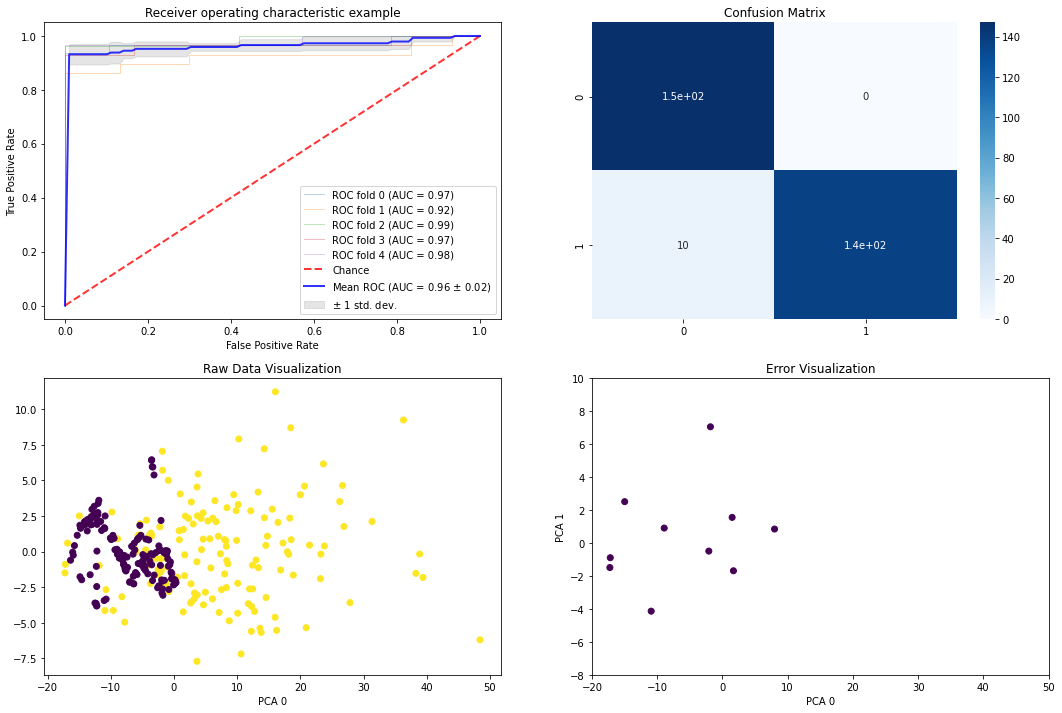

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sc = StandardScaler()
X_std = sc.fit_transform(X)
X_std = pd.DataFrame(X, columns=X.columns)

errors = evaluation(X_std, y, LogisticRegression(random_state=42))

The model manages to clearly differentiate between Healthy Subjects and Patients, achieving an accuracy of 96% +/- 2% (using the ROC metric) in cross-validation (*k = 5*). Apart from being able to distinguish Healthy Subjects and Patients with more advanced facets of the disease, those who are in the right part of the Raw Data Visualization plot, the model also succeeds in identifying Healthy Subjects and Patients with previous facets of the disease (with lower accuracy).

The main problem of this model is that it has some difficulties identifying patients. The Confusion Matrix shows that there is a 100% accuracy in Healthy Subjects identification while the Patients identification is a bit lower. This problem will also be present in the rest of the models.

**3.2.2.2. Support Vector Classifier**

**Suport Vector Classifiers (SVCs)** are one of the most used models in terms of Multiple Sclerosis Identification. *Zurita et al.* (1) used suport vector classifiers with linear kernel in order to identify Multiple Sclerosis Patients from Healthy Subjects, as well as to distinguish between different types of Multiple Sclerosis Patients by it's EDSS (*Expanded Disability Status Scale*) value, which measures the level of discapacity. In it's study, they have tested different types of data: FA voxel-wise value, DTI connectivity matrix, rsfMRI correlation matrix and Normalized combination of DTI connectivity and rsfMRI correlation matrices. The study achieved a mean accuracy of 89% +/- 2% in the Multiple Sclerosis Identification task.

Another study worth mentioning is one conducted by *Solana et al.* (2), which is also about Multiple Sclerosis Identification but, unlike the one conducted by *Zurita et al.*, this one used node-based graph metrics among the groups as input data. Using suport vector classifiers with radial basis function kernel they achieved an accuracy between 74.8% and 77.2%. 

Finally, *Muthuraman et al.* (3) tried to differentiate between Clinical Isolated Syndrom (CIS) patients and Relapsing-Remitting Multiple Sclerosis (RRMS) patients using suport vector classifiers with a polynomial kernel and node-based graph metrics data. They managed to distinguish this kind of patients with an accuracy of 97% (in terms of the ROC curve) in cross-validation. 

(1) Zurita, M., Montalba, C., Labbé, T., Cruz, J. P., Dalboni da Rocha, J., Tejos, C., Ciampi, E., Cárcamo, C., Sitaram, R., & Uribe, S. (2018). Characterization of relapsing-remitting multiple sclerosis patients using support vector machine classifications of functional and diffusion MRI data. NeuroImage: Clinical, 20, 724–730. https://doi.org/10.1016/j.nicl.2018.09.002

(2) Solana, E., Martinez-Heras, E., Casas-Roma, J., Calvet, L., Lopez-Soley, E., Sepulveda, M., Sola-Valls, N., Montejo, C., Blanco, Y., Pulido-Valdeolivas, I., Andorra, M., Saiz, A., Prados, F., & Llufriu, S. (2019). Modified connectivity of vulnerable brain nodes in multiple sclerosis, their impact on cognition and their discriminative value. Scientific Reports, 9(1). https://doi.org/10.1038/s41598-019-56806-z

(3) Muthuraman, M., Fleischer, V., Kolber, P., Luessi, F., Zipp, F., & Groppa, S. (2016). Structural Brain Network Characteristics Can Differentiate CIS from Early RRMS. Frontiers in Neuroscience, 10. https://doi.org/10.3389/fnins.2016.00014

SVCs are a powerful tool for both linear and non-linear classification tasks. The main problem is that, unlike Logistic Regression, SVCs have numerous hyperparameters that if they are poorly adjusted, can have a negative influence on model performance. There is no unique solution for hyperparameter tunning in Multiple Sclerosis Identification, all the three studies mentioned before used different hyperparameter tunning, even for the kernel, none of them used the same. That is why a GridSearchCV will be performed in order to adjust the hyperparameters before modeling.

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

sc = StandardScaler()
X_std = sc.fit_transform(X)
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf', 'linear', 'poly', 'sigmoid'], 
                     'gamma': [1e-3, 1e-4, 1e-2, 1e-5],
                     'C': [0.1, 1, 10, 100, 500, 1000, 3000]}]

clf = GridSearchCV(
        SVC(random_state=42), tuned_parameters, scoring='f1', cv=5)

clf.fit(X_std, y)
print(clf.best_params_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


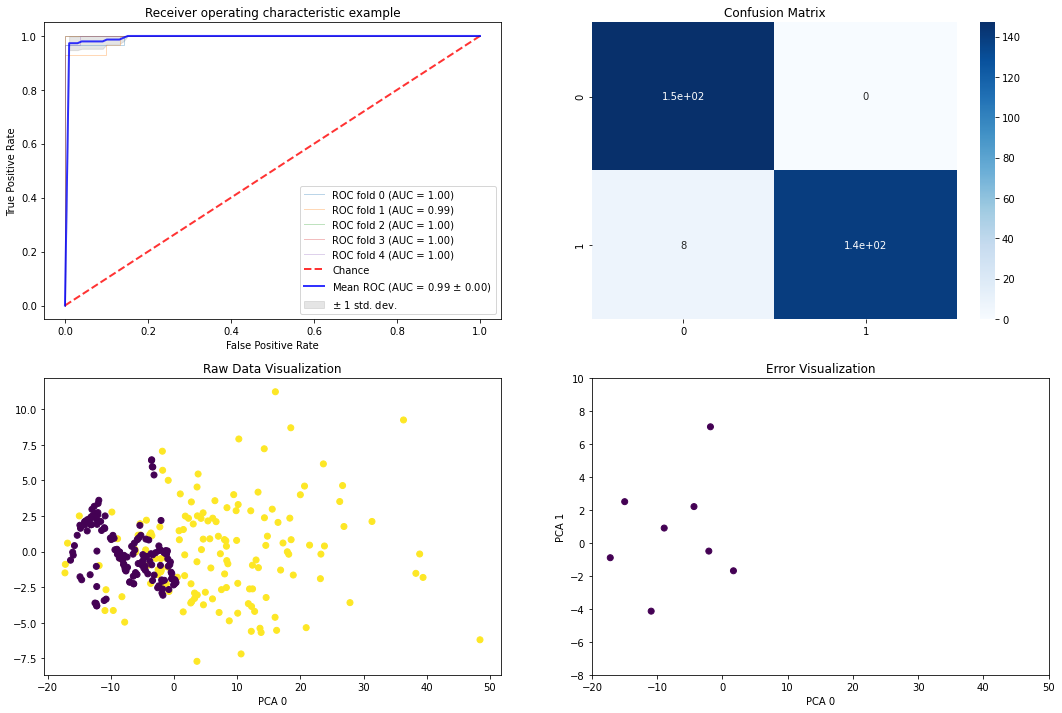

In [13]:
from sklearn.svm import SVC

X_std = pd.DataFrame(X_std, columns=X.columns)
e = evaluation(X_std, y, SVC(kernel="rbf", C=1, gamma=0.01))

The results for this model are quite similar to the ones obtained with the Logistic Regression, with a slightly better performance. The model achieves an accuracy of 99% (using the ROC metric) in cross-validation (*k = 5*). However, just as with Logistic Regression, the model seems to strugle being able to distinguish Healthy Subjects with Patients with previous facets of the disease (with lower accuracy).

The main problem of this model, as seen in Logistic Regression, is realted to patients identification. The Confusion Matrix shows that there is a 100% accuracy in Healthy Subjects identification while the Patients identification is a bit lower.

**3.2.2.3. Random Forest Classifier**

Another algorithm that is also capable of handling non-linear and linear problems is Random Forest. **Random Forest Classifiers (RFCs)** are a supervised algorithm that consists of an ensemble of *Decision Trees* built using "bagging" (**b**ootstrap **agg**regat**ing**). Bagging is a meta-algorithm designed to improve the stability and accuracy of machine learning algorithms by using sampling techniques with replacement. This allows the algorithm to learn complex patterns hidden in the data. It is also possible to build random forests using "pasting", which builds models by using sample techniques *without* replacement. However, in practice "bagging" has shown a better model performance.

RFCs are not commonly used in Medical Research due to their tendency to overfit the data, especially in small datasets with high dimensionality, where Random Forests tend to create deeper trees with poor explanatory capacity. Despite this disadvantage, we hypothesize that with correct hyperparameter tuning the problem can be solved. In order to find the best hyperparameters for our Random Forest Classifier, a GridSearchCV will be performed in order to adjust the hyperparameters before modeling.

In [14]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [200, 500, 700, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [2, 3, 5, 7, 10, 15, 20]
}

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_std, y)
CV_rfc.best_params_

{'max_depth': 7, 'max_features': 'auto', 'n_estimators': 500}

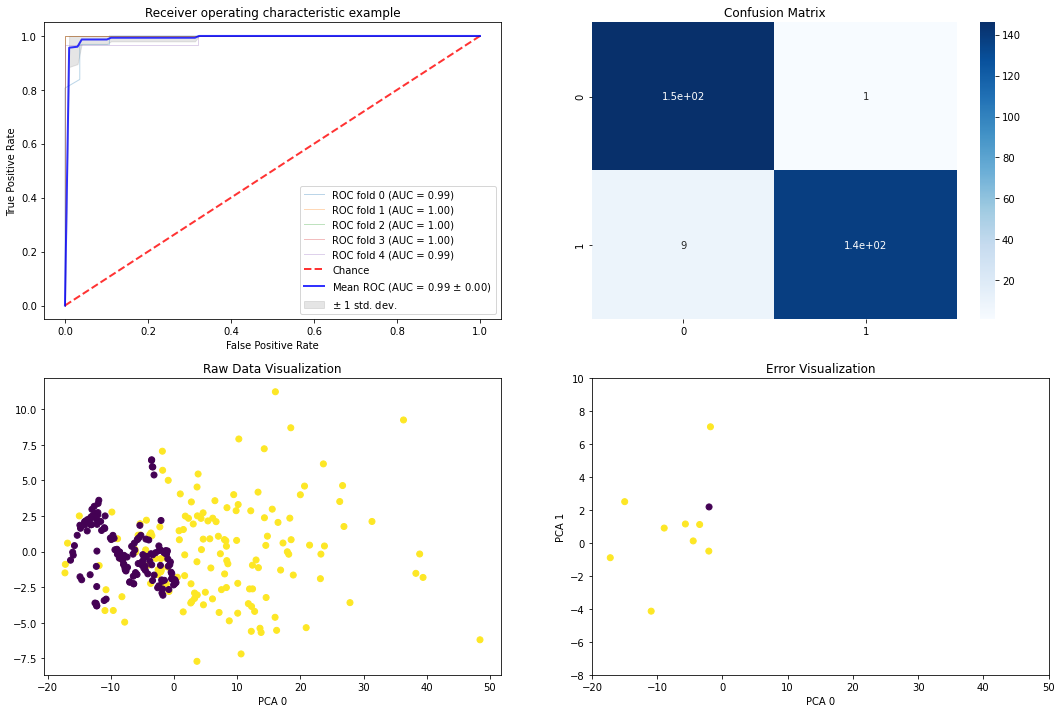

In [17]:
from sklearn.ensemble import RandomForestClassifier
e = evaluation(X_std, y, RandomForestClassifier(max_depth=10, max_features = "auto", n_estimators = 200, random_state=42))

As we have seen in the previous models, the results for this model are nearly perfect. The model achieves an accuracy of 99% (using the ROC metric) in cross-validation (*k = 5*). However, just as with Logistic Regression and SVCs, the model seems to struggle to be able to distinguish Healthy Subjects from Patients with previous facets of the disease (with lower accuracy).

The main problem of this model, as seen in the previous models, is that it confuses patients with healthy subjects. The Confusion Matrix shows that when identifying Healthy Subjects the accuracy is nearly perfect (not perfect as seen in the previous models) and, the accuracy drops a bit when identifying Patients.

**3.2.2.4. XGBoost**

Finally, the last model we will test in this project is the Extreme Gradient Boosting Classifier (**XGBoost Classifier**). XGBoost is a relatively new type of ensemble model, which consists of an *improved* Random Forest that uses a gradient boosting framework. Since its introduction in 2016, this algorithm has gain popularity due to being involved in winning numerous Kaggle competitions and also for being related to several cutting-edge industry applications.

This boosting framework is an alternative approach where each *Decision Tree* alters the evaluation criteria based on feedback from the previous *Decision Tree*. More specifically, every new *Decision Tree* tries to adjust to the residual errors done by the previous *Decision Tree*. As happened with SVCs and RFCs, there are several hyperparameters to take care of. For this reason, a GridSearchCV is also going to be applied.

In [18]:
from xgboost import XGBClassifier

sc = StandardScaler()
X_std = sc.fit_transform(X)
# Set the parameters by cross-validation
tuned_parameters = [{"learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
                     "max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15],
                     "min_child_weight": [ 1, 3, 5, 7 ],
                     "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                     "colsample_bytree": [ 0.3, 0.4, 0.5 , 0.7 ],
                     "n_jobs": [1], # replace "nthread"
                     "verbosity": [0]}]# add this line to slient warning message

xgb_gs = GridSearchCV(
        XGBClassifier(random_state=42), tuned_parameters, scoring='f1')

xgb_gs.fit(X_std, y)
print(xgb_gs.best_params_)

{'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_jobs': 1, 'verbosity': 0}


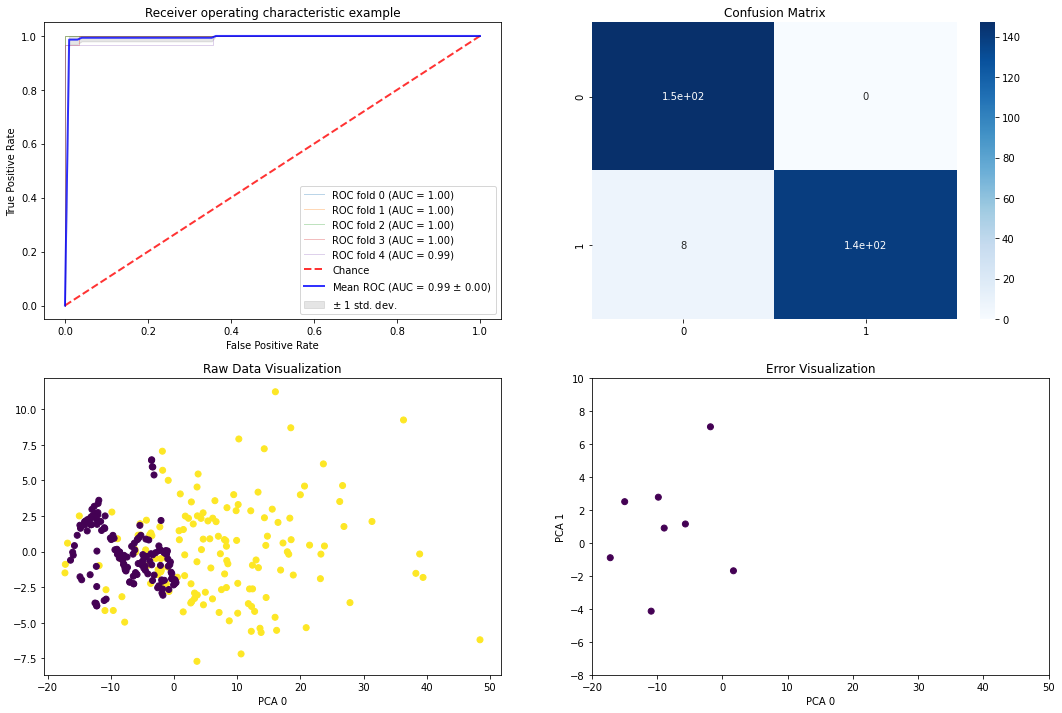

In [20]:
from xgboost import XGBClassifier
X_std = pd.DataFrame(X_std, columns=X.columns)
e = evaluation(X_std, y, XGBClassifier(colsample_bytree= 0.5, gamma= 0.2, learning_rate= 0.2, max_depth= 5, min_child_weight= 1, random_state=42))

There is no major difference between this model and the previous ones in terms of model accuracy. It reaches a mean accuracy of 99% (using ROC metric) in cross-validation (*k = 5*). As happened with the other models, this one also shows minor problems identifying Patients.

## 4. Conclusions

Our results have achieved in all classification algorithms of machine learning an accuracy higher than 95% to discriminate MS patients from HC. Moreover, the study demonstrated that several eloquent FA-weighted connections (183) and only a few GM networks (4) are sensitive measures to differentiate the normal brains and the pathologic hallmarks of MS.  The identification of these pathogenic changes on the brain networks could help to identify the presence and severity of MS damage and the mechanisms related to brain network collapse. Future work should be focused to describe the distinct pathological process of MS disease and their association with cognitive and clinical disability progression. 